In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
from scipy import stats
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
Data = pd.read_excel('being.xlsm')


Data1=Data

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Day               405 non-null    object 
 1   Diet              405 non-null    int64  
 2   slept :           405 non-null    float64
 3   💻 Data Scientist  392 non-null    float64
 4   Mindset 🌻         353 non-null    object 
 5   Story Worthy 💖    301 non-null    object 
 6   Date              405 non-null    object 
 7   Efficiency        405 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 25.4+ KB


In [4]:
Data['Date']=Data['Date'].apply(lambda x: x.replace("@", ""))

In [5]:
 Data['Date'].value_counts()

Oct 22, 2020    2
Nov 2, 2020     2
Jun 9, 2020     1
May 31, 2020    1
Jul 3, 2020     1
               ..
Apr 7, 2021     1
Oct 15, 2020    1
Mar 10, 2021    1
May 13, 2021    1
Mar 3, 2021     1
Name: Date, Length: 403, dtype: int64

In [6]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [7]:
Data['Date'].value_counts()

2020-10-22    2
2020-11-02    2
2021-06-04    1
2021-04-18    1
2020-09-16    1
             ..
2021-01-16    1
2020-11-15    1
2020-09-14    1
2020-07-14    1
2021-04-03    1
Name: Date, Length: 403, dtype: int64

In [8]:
Data['Month']= Data['Date'].dt.month

In [9]:
Data['Month'].value_counts()

5     62
6     40
12    31
10    31
8     31
7     31
1     31
11    30
9     30
4     30
3     30
2     28
Name: Month, dtype: int64

In [10]:
Data['Date'] = Data1['Date'].dt.month

In [11]:
Data.apply(pd.Series.nunique)


Day                   7
Diet                  4
slept :              19
💻 Data Scientist     29
Mindset 🌻             4
Story Worthy 💖      301
Date                 12
Efficiency            7
Month                12
dtype: int64

In [12]:
Data.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='Greens')\
        .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
Diet,405.000000,1.676543,0.923600,1.000000,1.000000,1.000000,2.000000,4.000000
slept :,405.000000,7.375309,1.708752,2.000000,6.300000,7.000000,9.000000,14.000000
💻 Data Scientist,392.000000,4.640306,3.407395,0.000000,0.500000,6.000000,7.500000,15.000000
Date,405.000000,6.404938,3.298511,1.000000,4.000000,6.000000,9.000000,12.000000
Efficiency,405.000000,66.460905,23.349509,0.000000,50.000000,66.666667,83.333333,100.000000
Month,405.000000,6.404938,3.298511,1.000000,4.000000,6.000000,9.000000,12.000000


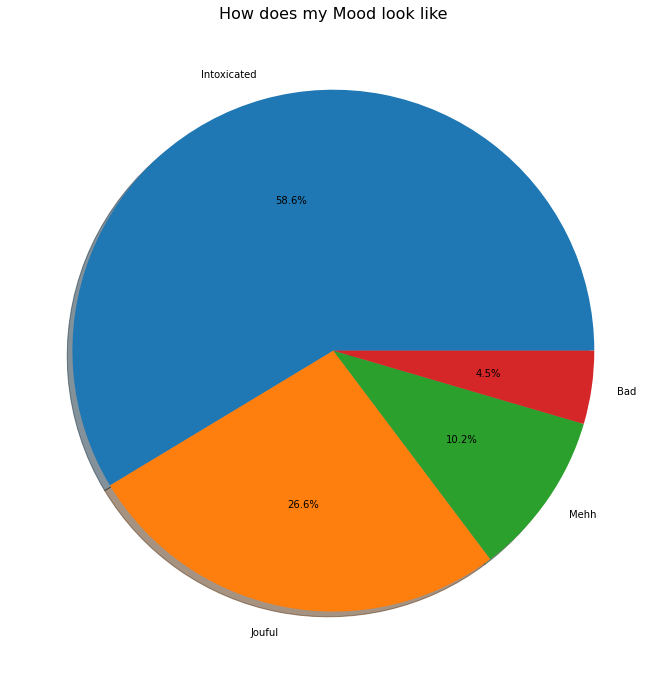

In [13]:
#pie chart for the target value

plt.figure(figsize= (12,12))
df_target= Data['Mindset 🌻'].value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )

plt.title('How does my Mood look like', fontsize= 16)

plt.show()

In [14]:
Data.groupby('Mindset 🌻',as_index=False).agg({'slept :':'mean'})

,Mindset 🌻,slept :
0,Bad,7.362500
1,Intoxicated,7.248792
2,Jouful,7.620213
3,Mehh,7.033333


#### I sleep on an Average for 7 hours in all state of mind

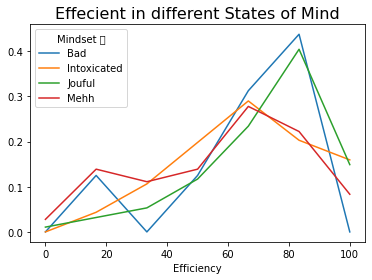

In [15]:
pd.crosstab(Data['Efficiency'], Data1['Mindset 🌻'],normalize='columns').plot()
plt.title('Effecient in different States of Mind', fontsize= 16)
plt.show()

#### WHEN I AM HAPPY I AM MUCH MORE EFFECIENT

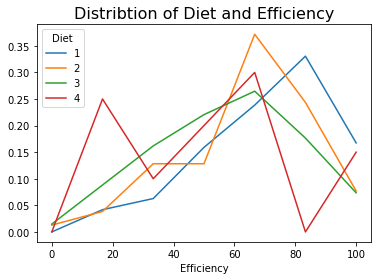

In [16]:
pd.crosstab(Data['Efficiency'], Data1['Diet'],normalize='columns').plot()
plt.title('Distribtion of Diet and Efficiency', fontsize= 16)
plt.show()

#### When i am eating good Food, i am very efficent and If i dont eat good food or on cheat days i am very happy and doing work or out of Guilt i am giving up efficency. Too Extereme

## Most of the cases i am being very lazy when i am on 3 or 4 diet 

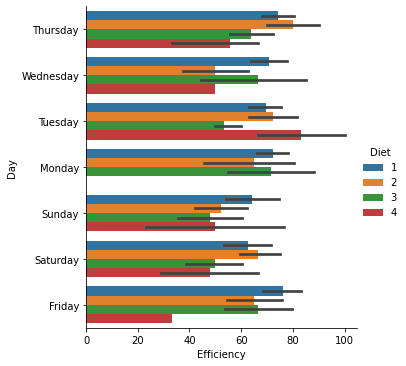

In [17]:
#the distrubtion of activty over age for being the potential lead

sns.catplot(x="Efficiency", y="Day" , hue="Diet",kind="bar",data=Data1)
plt.show()


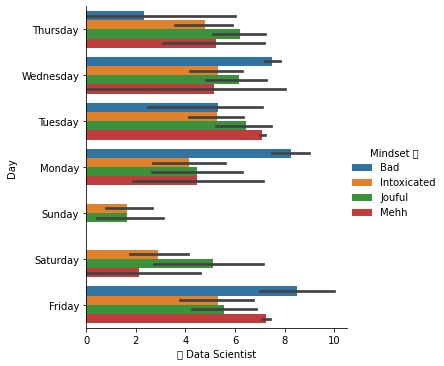

In [18]:
#the distrubtion of activty over age for being the potential lead

sns.catplot(x="💻 Data Scientist", y="Day" , hue="Mindset 🌻",kind="bar",data=Data1)
plt.show()


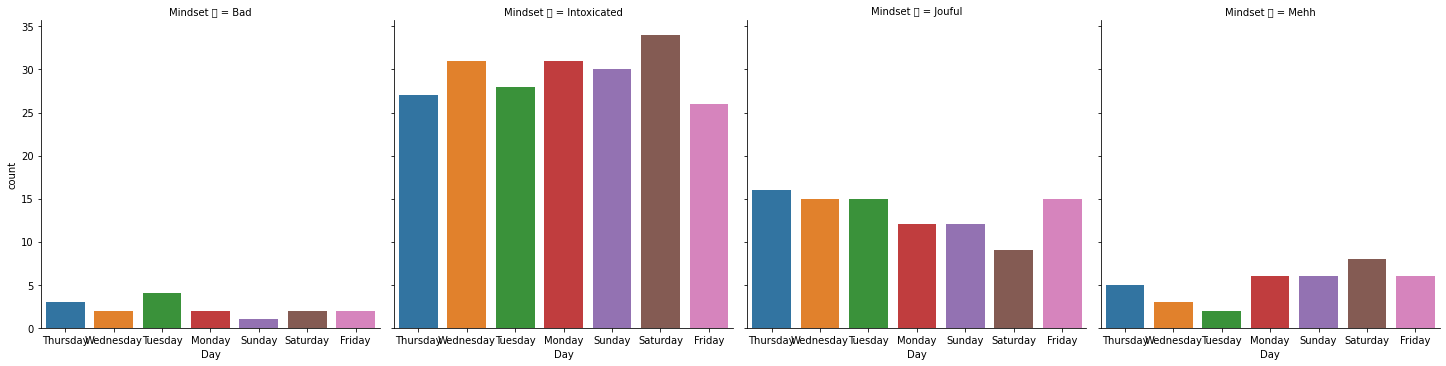

In [19]:
sns.factorplot("Day", col = "Mindset 🌻", data = Data,kind = "count");
plt.show()

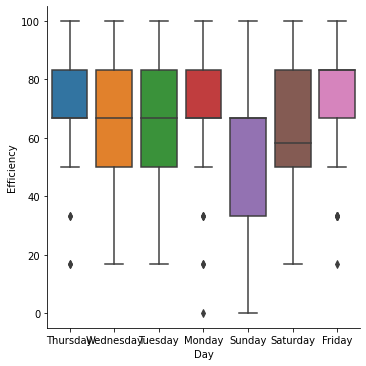

In [20]:
#the distrubtion of activty over age for being the potential lead

sns.catplot(x="Day", y="Efficiency" ,kind="box",data=Data1)
plt.show()


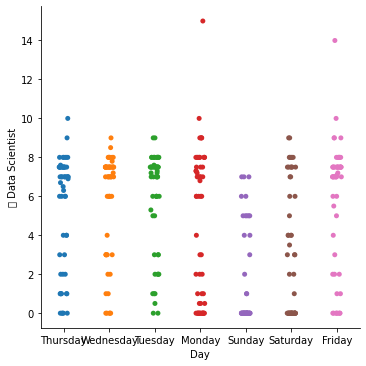

In [21]:
#checking the occupation type along with balance and which type has likiness of conversion for lead

sns.catplot(x="Day", y="💻 Data Scientist",data=Data1)
plt.show()

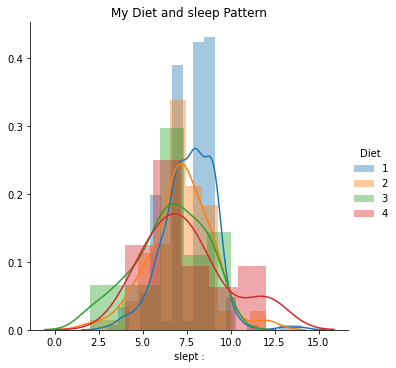

In [22]:
sns.FacetGrid(Data1,hue='Diet',size=5).map(sns.distplot,'slept :').add_legend().set(title='My Diet and sleep Pattern')
plt.show()

#Avg_Account_Balance is very skewd 

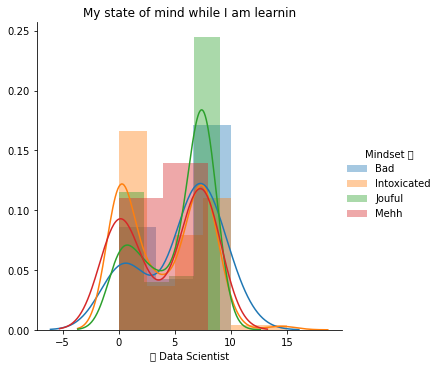

In [23]:
sns.FacetGrid(Data1,hue='Mindset 🌻',size=5).map(sns.distplot,'💻 Data Scientist').add_legend().set(title='My state of mind while I am learnin')
plt.show()

#Avg_Account_Balance is very skewd 

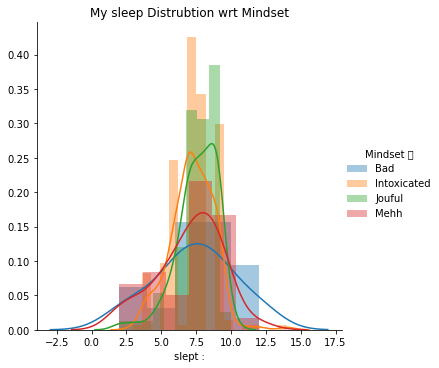

In [24]:
sns.FacetGrid(Data1,hue='Mindset 🌻',size=5).map(sns.distplot,'slept :').add_legend().set(title='My sleep Distrubtion wrt Mindset')
plt.show()

#Avg_Account_Balance is very skewd 

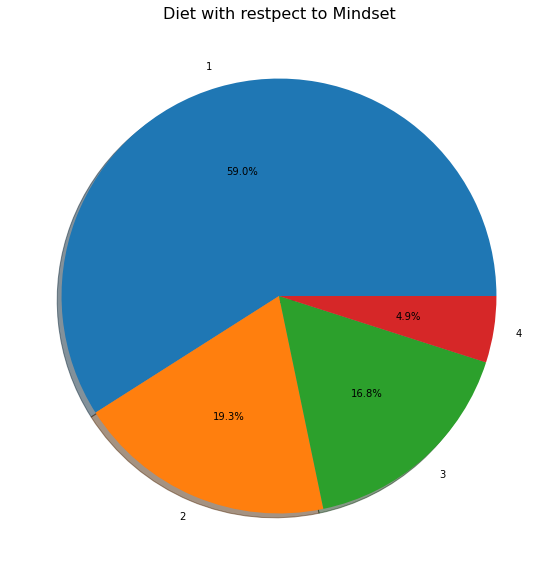

In [25]:

#pie chart for the target value

plt.figure(figsize= (10,10))
df_target= Data.Diet.value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )
plt.title('Diet with restpect to Mindset', fontsize= 16)
plt.show()

In [26]:
Data.groupby('Mindset 🌻',as_index=False).agg({'Day':'count'})

,Mindset 🌻,Day
0,Bad,16
1,Intoxicated,207
2,Jouful,94
3,Mehh,36


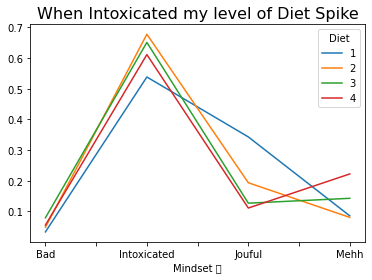

In [27]:
pd.crosstab(Data['Mindset 🌻'], Data1['Diet'],normalize='columns').plot()
plt.title('When Intoxicated my level of Diet Spike', fontsize= 16)
plt.show()

In [28]:
Data.groupby('Mindset 🌻',as_index=False).agg({'💻 Data Scientist':'sum'})

,Mindset 🌻,💻 Data Scientist
0,Bad,76.7
1,Intoxicated,857.3
2,Jouful,465.3
3,Mehh,141.2
